## using important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [3]:
# Load both fake and real news datasets
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add labels
fake['label'] = 0  # 0 = Fake
real['label'] = 1  # 1 = Real

# Combine the datasets
data = pd.concat([fake, real], ignore_index=True)

# Show the first few rows
data.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
# Remove punctuation and lowercase the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data['text'] = data['text'].apply(clean_text)


In [5]:
# Features and labels
X= data['text']
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [6]:
# Convert text into numerical form
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# import joblib
# joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

In [8]:
model = PassiveAggressiveClassifier(max_iter=100,C=1000,verbose=1)
model.fit(X_train_tfidf, y_train)



-- Epoch 1
Norm: 62.53, NNZs: 78574, Bias: -0.817256, T: 35353, Avg. loss: 0.093283
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 67.88, NNZs: 80214, Bias: -0.894928, T: 70706, Avg. loss: 0.014831
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 69.91, NNZs: 80530, Bias: -0.908012, T: 106059, Avg. loss: 0.005999
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 70.73, NNZs: 80574, Bias: -0.923319, T: 141412, Avg. loss: 0.003150
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 71.14, NNZs: 80653, Bias: -0.923717, T: 176765, Avg. loss: 0.002133
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 71.34, NNZs: 80653, Bias: -0.927425, T: 212118, Avg. loss: 0.001625
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 71.44, NNZs: 80653, Bias: -0.926773, T: 247471, Avg. loss: 0.001400
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 71.49, NNZs: 80653, Bias: -0.927456, T: 282824, Avg. loss: 0.001284
Total training time: 0.20 seconds.
-- Epoch 9
Norm: 71.51, NNZs: 80657, Bias:

,C,1000
,fit_intercept,True
,max_iter,100
,tol,0.001
,early_stopping,False
,validation_fraction,0.1
,n_iter_no_change,5
,shuffle,True
,verbose,1
,loss,'hinge'
,n_jobs,None


Test Accuracy: 0.9943207126948775
Test Accuracy: 0.9999721588061696


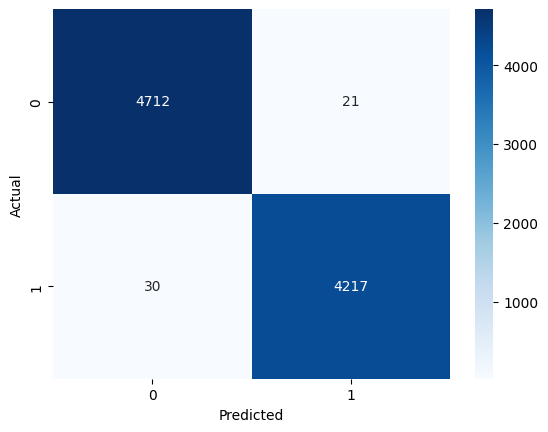

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4733
           1       1.00      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [9]:
y_pred = model.predict(X_test_tfidf)
y_pred_train=model.predict(X_train_tfidf)
# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_train, y_pred_train))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed report
print(classification_report(y_test, y_pred))

In [10]:
lr_model=LogisticRegression(max_iter=1000,C=10,penalty='l2',solver='lbfgs')
lr_model.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
y_pred = lr_model.predict(X_test_tfidf)
y_pred_train=lr_model.predict(X_train_tfidf)
# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.9925389755011136
Train Accuracy: 0.9992761289604098


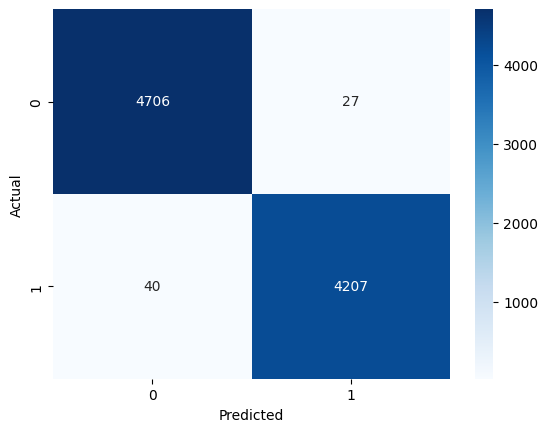

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed report
print(classification_report(y_test, y_pred))

In [13]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['lbfgs'],
#     'class_weight': [None, 'balanced']
# }

# grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
# grid.fit(X_train_tfidf, y_train)

# print("Best parameters:", grid.best_params_)


In [14]:
# import joblib

# def save_model(models:list):

#     for model in models:
#         joblib.dump(model,f'{str(model)}.pkl')
#         print(f"model {str(model)} has been saved")

In [15]:
# save_model([lr_model])

In [16]:
from sklearn.svm import LinearSVC

model_svm=LinearSVC(C=5)
model_svm.fit(X_train_tfidf,y_train)



,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,5
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [17]:
y_pred = model_svm.predict(X_test_tfidf)
y_pred_train=model_svm.predict(X_train_tfidf)
# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.9948775055679288
Train Accuracy: 0.9999721588061696


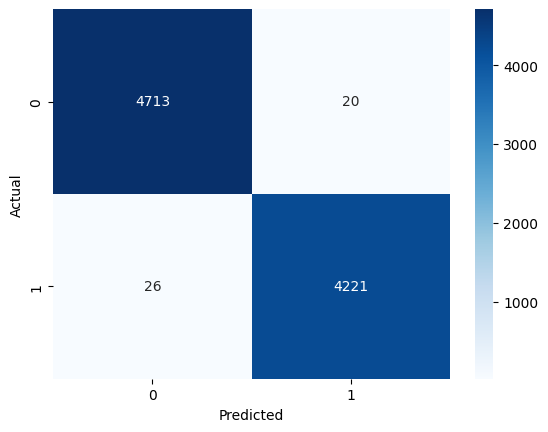

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4733
           1       1.00      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed report
print(classification_report(y_test, y_pred))